In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Activation,Input,BatchNormalization,Flatten, Dense, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal

ERROR! Session/line number was not unique in database. History logging moved to new session 72


In [14]:
def VGG16(input_shape,num_units):
    inputs = Input(shape=input_shape)
    
    def actconv(inputs, num_filters):
        x=Conv2D(filters=num_filters,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer=he_normal())(inputs)
        x=BatchNormalization()(x)
        x=Activation(activation='relu')(x)
        return x
    
    x=actconv(inputs,num_filters=64)
    x=actconv(x,num_filters=64)
    x=MaxPool2D(strides=(2,2))(x)
    
    x=actconv(x,num_filters=128)
    x=actconv(x,num_filters=128)
    x=MaxPool2D(strides=(2,2))(x)
    
    x=actconv(x,num_filters=256)
    x=actconv(x,num_filters=256)
    x=actconv(x,num_filters=256)
    x=MaxPool2D(strides=(2,2))(x)
    
    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=MaxPool2D(strides=(2,2))(x)
    
    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=MaxPool2D(strides=(2,2))(x)
    
    x=Flatten()(x)
    x=Dense(units=4096,activation='relu',kernel_initializer=he_normal())(x)
    x=Dense(units=1000,activation='relu')(x)
    x=Dropout(0.5)(x)

    outputs=Dense(units=10,activation='softmax')(x)
    
    model=Model(inputs,outputs)
    return model

    
model=VGG16(input_shape=(32,32,3),num_units=10)
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 64)        0   

In [15]:
def cifar10_load_data():  
    (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = cifar10.load_data()
    
    train_validation_images = train_validation_images.reshape(-1,32,32,3)
    test_images = test_images.reshape(-1,32,32,3)
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train set')
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
    print('Validation set')
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
    print('Train & validation set')
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [16]:

# Assuming you already have your model and data prepared
train_x, train_y, validation_x, validation_y, test_x, test_y  = cifar10_load_data()




model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use the ResetMetricsCallback during training
history = model.fit(train_x, train_y, epochs=20, batch_size=64,validation_data=(validation_x, validation_y))

# Evaluate on the test set after training
result = model.evaluate(test_x, test_y)
print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

Train set
Image : (40000, 32, 32, 3)
Label : (40000, 1)
Validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Train & validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 15s 374us/sample - loss: 2.0873 - accuracy: 0.2023 - val_loss: 2.0636 - val_accuracy: 0.2118
Epoch 2/20
40000/40000 [==============================] - 16s 407us/sample - loss: 1.5607 - accuracy: 0.3885 - val_loss: 1.3908 - val_accuracy: 0.4971
Epoch 3/20
40000/40000 [==============================] - 15s 383us/sample - loss: 1.1700 - accuracy: 0.5809 - val_loss: 1.3680 - val_accuracy: 0.5509
Epoch 4/20
40000/40000 [==============================] - 16s 389us/sample - loss: 0.9074 - accuracy: 0.6908 - val_loss: 0.9492 - val_accuracy: 0.6781
Epoch 5/20
40000/40000 [==============================] - 15s 380us/sample - loss: 0.7544 - accuracy: 0.7490 - val_loss: 0.9520 - val_accuracy: 0.7020
Epoch 6/2

In [5]:
import tensorflow as tf

print(tf.__version__)
# 2.5.0

2.1.0


In [6]:
# 주로 사용하는 코드 2 : 인식한 GPU 개수 출력
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


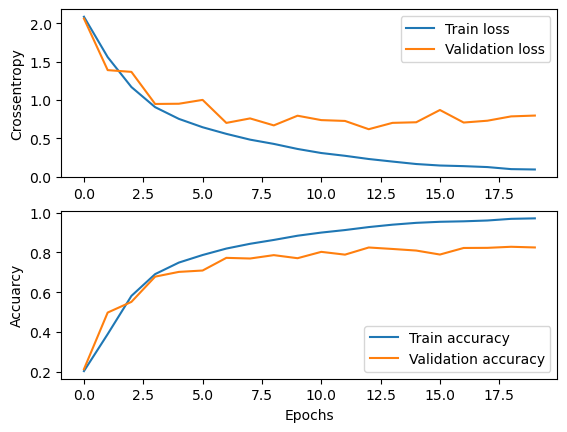

In [17]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

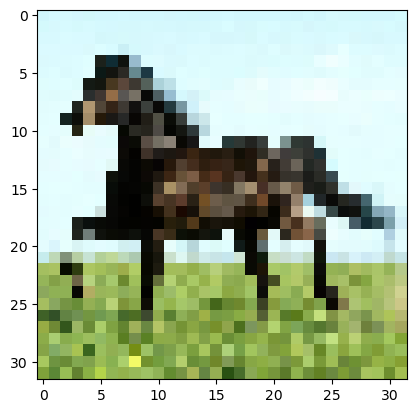

In [18]:
import cv2
im=cv2.imread('horse.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #색공간 변환
im = cv2.resize(im, (32,32))
plt.imshow(im)
plt.show()

In [ ]:
r = model.predict(im, batch_size=32, verbose=1)
print("예측한 결과 = " , labels[res.argmax()])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tlsdu\AppData\Local\Temp\ipykernel_14172\891537816.py", line 1, in <module>
    r = model.predict(im, batch_size=32, verbose=1)
  File "C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 498, in predict
    workers=workers, use_multiprocessing=use_multiprocessing, **kwargs)
  File "C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 426, in _model_iteration
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\tensorflow_c